In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Salary_Data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
x=df.iloc[:,0:1]
y=df.iloc[:,1:]

# how to treat missing values 

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values='NaN',strategy='mean')
im=im.fit(x)
x=im.transform(x)
#x=im.fit_transform(x)

# encoding(convert categorical data to numeric data)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()#approach 1,2,3
x=le.fit_transform(x)
oh=OneHotEncoder(categories=[0])#approach get_dummies
x=oh.fit_transform(x)

# standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# train test split

In [15]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=10)
print(x_train,x_test,y_train,y_test)

    YearsExperience
13              4.1
27              9.6
12              4.0
1               1.3
19              6.0
14              4.5
18              5.9
6               3.0
11              4.0
23              8.2
24              8.7
28             10.3
22              7.9
10              3.9
26              9.5
29             10.5
8               3.2
25              9.0
16              5.1
17              5.3
0               1.1
15              4.9
4               2.2
9               3.7     YearsExperience
20              6.8
7               3.2
5               2.9
2               1.5
3               2.0
21              7.1       Salary
13   57081.0
27  112635.0
12   56957.0
1    46205.0
19   93940.0
14   61111.0
18   81363.0
6    60150.0
11   55794.0
23  113812.0
24  109431.0
28  122391.0
22  101302.0
10   63218.0
26  116969.0
29  121872.0
8    64445.0
25  105582.0
16   66029.0
17   83088.0
0    39343.0
15   67938.0
4    39891.0
9    57189.0      Salary
20  91738.0
7   54445.0

# Creating model(learning model)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
h=lr.predict(x_test)#doing prediction
print(h,x_test,y_test)

[[89715.76498848]
 [56031.05821174]
 [53223.99931368]
 [40124.39112273]
 [44802.8226195 ]
 [92522.82388655]]     YearsExperience
20              6.8
7               3.2
5               2.9
2               1.5
3               2.0
21              7.1      Salary
20  91738.0
7   54445.0
5   56642.0
2   37731.0
3   43525.0
21  98273.0


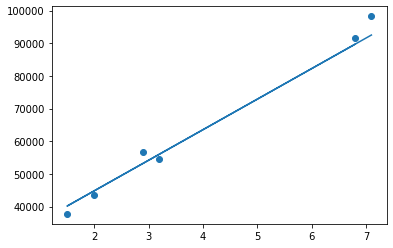

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test)
plt.plot(x_test,h)
plt.show()

In [21]:
k=lr.predict(x_train)
print(x_train,k,y_train)

    YearsExperience
13              4.1
27              9.6
12              4.0
1               1.3
19              6.0
14              4.5
18              5.9
6               3.0
11              4.0
23              8.2
24              8.7
28             10.3
22              7.9
10              3.9
26              9.5
29             10.5
8               3.2
25              9.0
16              5.1
17              5.3
0               1.1
15              4.9
4               2.2
9               3.7 [[ 64452.23490593]
 [115914.98137039]
 [ 63516.54860657]
 [ 38253.01852402]
 [ 82230.27459365]
 [ 68194.98010334]
 [ 81294.5882943 ]
 [ 54159.68561303]
 [ 63516.54860657]
 [102815.37317944]
 [107493.80467621]
 [122464.78546587]
 [100008.31428138]
 [ 62580.86230722]
 [114979.29507104]
 [124336.15806458]
 [ 56031.05821174]
 [110300.86357427]
 [ 73809.09789947]
 [ 75680.47049818]
 [ 36381.64592531]
 [ 71937.72530076]
 [ 46674.1952182 ]
 [ 60709.48970851]]       Salary
13   57081.0
27  112635.0
12  

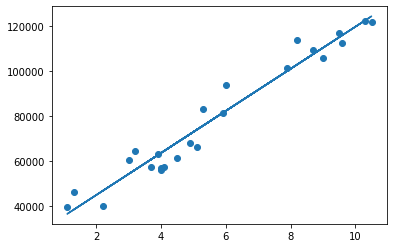

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,k)
plt.show()

In [24]:
lr.score(x_test,y_test)#accuracy of prediction

0.9816423482070253

In [25]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,h))#cost func

3128.189594464235